In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from pdb import set_trace as bp
import cv2

In [2]:
def createTiles(x=1,y=1,hwidth=8,vwidth=4): 
#     bp()
    plt.gcf().clear()
    fig,plots = plt.subplots(x,y,figsize=(hwidth,vwidth));
    plots = plots.flatten()
    return([fig, plots])

def visualizeImages(image,plots):
#     bp()
    num_kernel = image.shape[-1]
    num_image = image.shape[0]
    kernel_to_display = np.random.randint(num_kernel, size=3)
    
    count = 0
    
    for i in range( num_image):
        for j in range(3):
            plots[count].imshow(image[i,:,:,kernel_to_display[j]])
            count+=1

In [3]:
pickle_path = '../roi_dump'
# image_base_path = '../viz_data/viz_images/'
image_base_path = '../../Emotion_Hackathon/data/Hackathon_Data/'
pkl_list = os.listdir(pickle_path)
pkl_list = [ pkl_file for pkl_file in pkl_list if 'pkl' in pkl_file] 
pkl_file = pkl_list[ np.random.randint(len(pkl_list)) ]
pkl_file_path = os.path.join(pickle_path,pkl_file)

In [4]:
with open(pkl_file_path, 'rb') as f:
    data = pickle.load(f)

roi_pool_1 = data['roi_pool_1'][0]
roi_pool_2 = data['roi_pool_2'][0]
roi_pool_4 = data['roi_pool_4'][0]

In [5]:
roi_pool_2.shape

(32, 24, 24, 128)

# Display original image

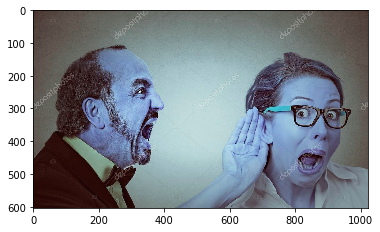

In [6]:
image_file_path = os.path.join(image_base_path ,os.path.splitext(pkl_file)[0]+'.jpg')
image = cv2.imread(image_file_path)
plt.imshow(image)
plt.show()
plt.gcf().clear()

### Visualize Pool1 layer

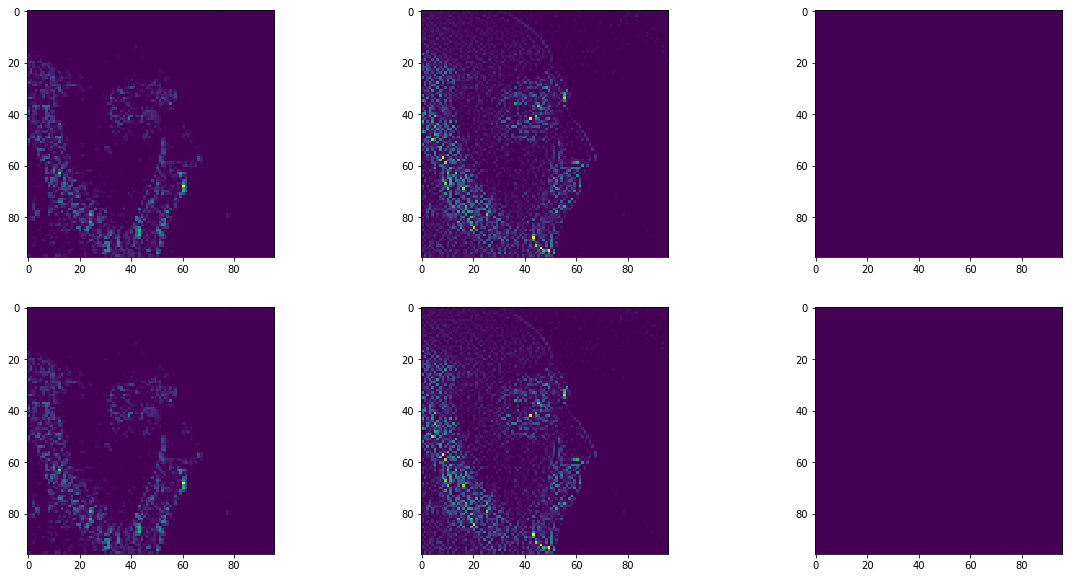

In [7]:
num_images = roi_pool_1.shape[0]
show_images = np.random.randint(num_images, size=min(2,num_images) ) 

viz_roi_pool_1 = roi_pool_1[ show_images ]
fig,plots = createTiles(2,3,20,10)
visualizeImages(viz_roi_pool_1,plots)
fig

### Visualize Pool2 layer

In [8]:
# num_images = roi_pool_2.shape[0]
# viz_roi_pool_2 = roi_pool_2[ show_images ]

# fig,plots = createTiles(10,3,20,40)
# visualizeImages(viz_roi_pool_2,plots)
# fig

### Visualize Pool4 layer

In [9]:
# num_images = roi_pool_4.shape[0]
# viz_roi_pool_4 = roi_pool_4[ show_images ]

# fig,plots = createTiles(10,3,20,40)
# visualizeImages(viz_roi_pool_4,plots)
# fig